<a href="https://colab.research.google.com/github/CaioMoraes38/Controle-de-Estoque---POE/blob/main/Jobs_salaries_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4321506%2F7426827%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240328%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240328T122607Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6288564f02a830852a5fa916d1373004ad536b75f58aae2cd1db24a8b85c276d0ac2685b57d2283fbc373fd56be9610bac326e92d791b22961df967984eba9b615c45ed5f0e1e293e0a6b9f18c409eb61574984f5ed8e06dc8aaa838cf5b79cdd375cc179d9b60141bdd4ddd9de30e23fb630fc42bbd03aad778f96fca3f20208b8fbda9ac9f89446d97f3d0c53be824dba257ae3285bee162e77111b27ababe0dd8db5c6231a11a90e1e4de5df0294a8c5556721b20f47e81b4a5d4e933e9100ae82e60acce182407e1e6e50dd9073a92e1e90aa728eb7af5b35f0fa216a14080e65fb91f2977a5bd2bd552a623e713b4fddcd8c540118ad061dada80e6ebe7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 77962 bytes downloaded
Downloaded and uncompressed: dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [4]:
df=pd.read_csv('/kaggle/input/dataset/Dataset.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


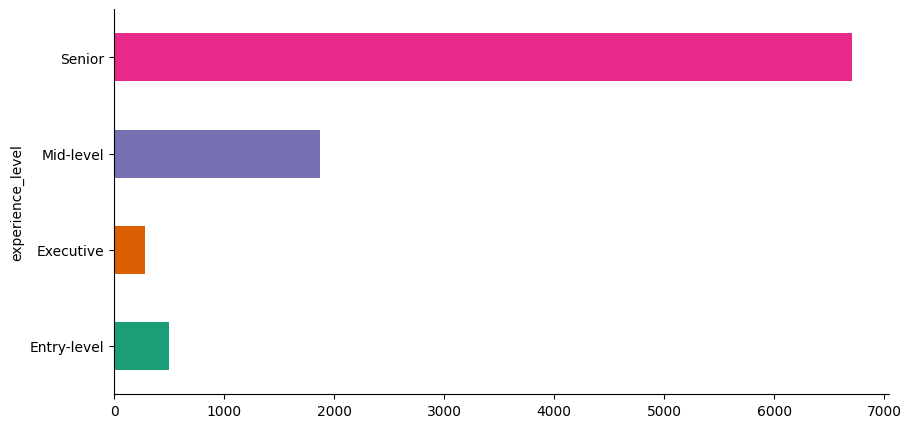

In [7]:
# @title experience_level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

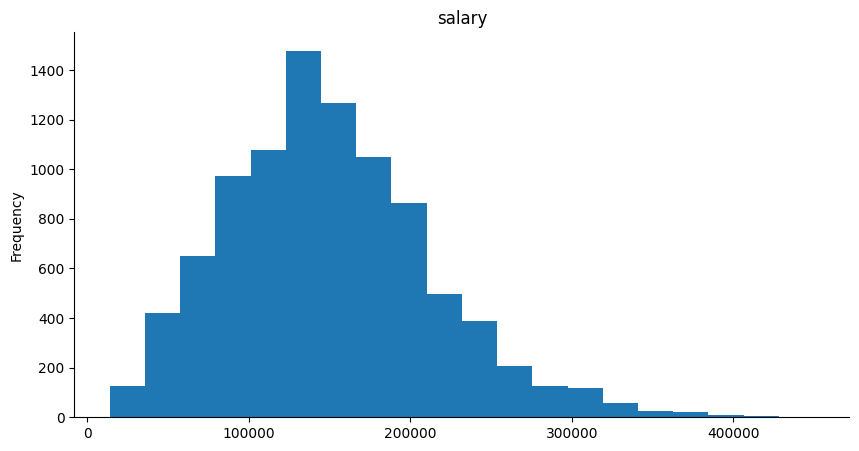

In [6]:
# @title salary

from matplotlib import pyplot as plt
df['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

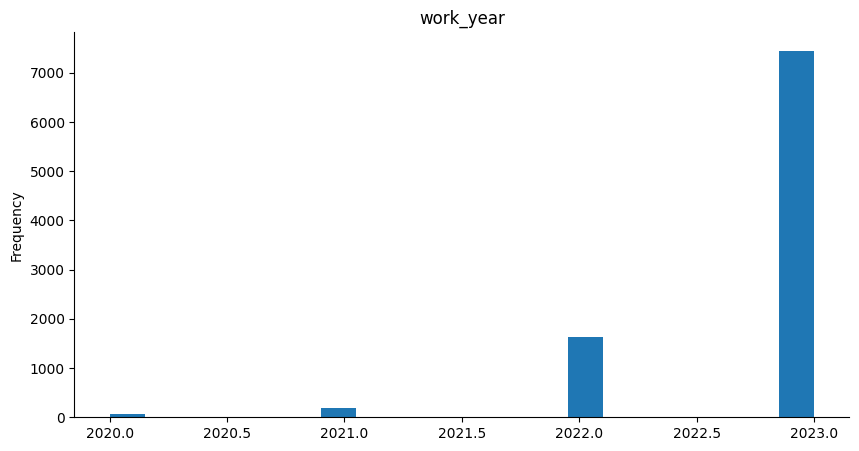

In [5]:
# @title work_year

from matplotlib import pyplot as plt
df['work_year'].plot(kind='hist', bins=20, title='work_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.shape

(9355, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [10]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [11]:
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [12]:
cat=df.select_dtypes(include='object')
cat.columns

Index(['job_title', 'job_category', 'salary_currency', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size'],
      dtype='object')

In [13]:
num=df.select_dtypes(include=np.number)
num.columns

Index(['work_year', 'salary', 'salary_in_usd'], dtype='object')

In [14]:
for i in cat.columns:
    print(f"The no.of unique values in {i.upper()} is {cat[i].nunique()} which are:\n {cat[i].unique()}\n")

The no.of unique values in JOB_TITLE is 125 which are:
 ['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Managem

In [15]:
for i in cat.columns:
    print(f"The most frequent value in {i.upper()} is:  {cat[i].mode()[0]} \n")

The most frequent value in JOB_TITLE is:  Data Engineer 

The most frequent value in JOB_CATEGORY is:  Data Science and Research 

The most frequent value in SALARY_CURRENCY is:  USD 

The most frequent value in EMPLOYEE_RESIDENCE is:  United States 

The most frequent value in EXPERIENCE_LEVEL is:  Senior 

The most frequent value in EMPLOYMENT_TYPE is:  Full-time 

The most frequent value in WORK_SETTING is:  In-person 

The most frequent value in COMPANY_LOCATION is:  United States 

The most frequent value in COMPANY_SIZE is:  M 



In [16]:
for i in num.drop('work_year',axis=1).columns:
    print(f"The skewness of {i.upper()} is: {num[i].skew()}")
    print(f"The mean of {i.upper()} is: {num[i].mean()}")
    print(f"The median of {i.upper()} is: {num[i].median()}")
    print(f"The median of {i.upper()} is: {num[i].mode()[0]}")
    print("\n")

The skewness of SALARY is: 0.579148786779734
The mean of SALARY is: 149927.98129342598
The median of SALARY is: 143860.0
The median of SALARY is: 150000


The skewness of SALARY_IN_USD is: 0.6212912531604922
The mean of SALARY_IN_USD is: 150299.4955638696
The median of SALARY_IN_USD is: 143000.0
The median of SALARY_IN_USD is: 150000




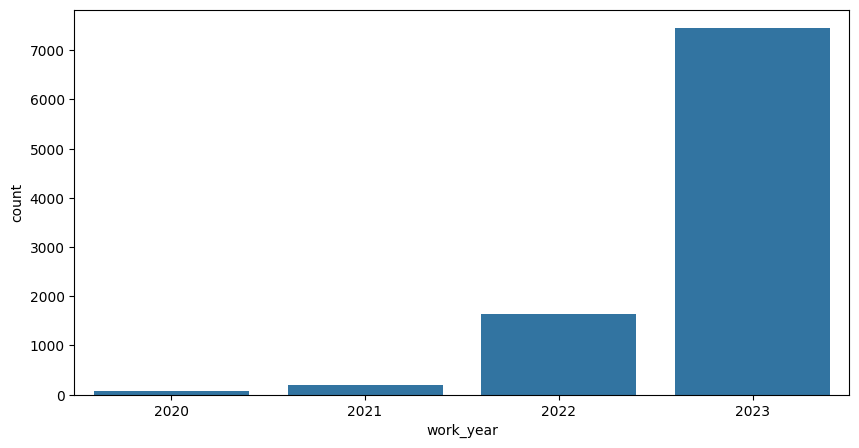

In [17]:
sns.countplot(x='work_year',data=df)
plt.show()

In [18]:
df['job_title'].value_counts()

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64

In [ ]:
df['job_category'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='job_category',data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df['job_category'].value_counts().plot(kind='pie',autopct='%0.2f%%')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
# lets find out the number of job titles under job categories

df.groupby('job_category')['job_title'].count().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [ ]:
# we will extract the number of job titles under job_category

In [ ]:
def job_title_extractor(category):
    title=[]
    a = df[df['job_category']==category]['job_title'].unique()
    title.append(a)
    return title[0]

In [ ]:
for i in df['job_category'].unique():
    print(f"The job titles in {i.upper()} category are: {len(job_title_extractor(i))}, which are:\n {job_title_extractor(i)}\n")

In [ ]:
sns.countplot(x='salary_currency',data=df)
plt.show()

In [ ]:
plt.subplot(1,2,1)
sns.kdeplot(df['salary'])
plt.title('salary')
plt.grid()
plt.subplot(1,2,2)
sns.kdeplot(df['salary_in_usd'])
plt.title('salary_in_USD')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# since there is salary magnitude difference, we will extract the conversion factor

In [ ]:
usd_multiplier = df['salary_in_usd']/df['salary']

In [ ]:
df['salary_mag_multiplier'] = pd.Series(usd_multiplier)
df.head()

In [ ]:
df['employee_residence'].nunique()

In [ ]:
df['company_location'].unique()

In [ ]:
location=['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta']

for i in location:
    if df[((df['company_location']==i) & (df['employee_residence']==i)).any(axis=1)]:
        print("Resident employee")
    else:
        print("Overseas employee")

In [ ]:
type_of_employee=[]
for i,j in list(zip(df['company_location'],df['employee_residence'])):
    if i==j:
         type_of_employee.append("resident employee")
    else:
         type_of_employee.append("overseas employee")



In [ ]:
sns.countplot(x=type_of_employee)
plt.show()

In [ ]:
df['type_of_employee'] = pd.Series(type_of_employee)
df.head()

In [ ]:
sns.countplot(x=df['experience_level'])
plt.show()

In [ ]:
sns.countplot(x=df['employment_type'])
plt.show()

In [ ]:
sns.countplot(x=df['work_setting'])
plt.show()

In [ ]:
sns.countplot(x=df['company_size'])
plt.show()

In [ ]:
# year-wise average salary
df.groupby('work_year')['salary'].mean().plot(kind='line')
plt.grid()
plt.show()

In [ ]:
# job title wise salary
df.groupby('job_title')['salary'].mean().sort_values(ascending=False)


In [ ]:
# job title wise salary_usd
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)


In [ ]:
df.groupby('job_title')[['salary','salary_in_usd']].mean()

In [ ]:
# experience wise salary

df.groupby('experience_level')[['salary','salary_in_usd']].mean().plot(kind='bar')
plt.show()

In [ ]:
# employment_type wise salary

df.groupby('employment_type')[['salary','salary_in_usd']].mean().plot(kind='bar')
plt.show()

In [ ]:
# work setting wise salary

df.groupby('work_setting')[['salary','salary_in_usd']].mean().plot(kind='bar')
plt.show()

In [ ]:
# company size wise salary

df.groupby('company_size')[['salary','salary_in_usd']].mean().plot(kind='bar')
plt.show()

In [ ]:
sns.kdeplot(x=df['salary_mag_multiplier'])
plt.grid()
plt.show()

In [ ]:
plt.subplot(1,2,1)
df.groupby('type_of_employee')['salary'].mean().plot(kind='pie',autopct='%0.2f%%')
plt.subplot(1,2,2)
df.groupby('type_of_employee')['salary_in_usd'].mean().plot(kind='pie',autopct='%0.2f%%')
plt.tight_layout()
plt.show()